<a href="https://colab.research.google.com/github/cclarke411/Deep-Learning-Experiments/blob/master/SpeechClassification30ClassesusingCNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U scipy==1.2.0

In [0]:
import os
import numpy as np
import pandas as pd
import librosa
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils  import to_categorical
from keras import losses, models, optimizers
from keras.layers import  Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation,GaussianNoise,BatchNormalization,LeakyReLU,AveragePooling2D
from keras import regularizers, optimizers
from keras.activations import relu, softmax
from keras.layers import Input,GlobalMaxPool1D,MaxPool1D
from keras.layers import Convolution1D
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from numpy import expand_dims
import seaborn as sns
import IPython.display as ipd
import IPython
from librosa import display
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
import scipy
from scipy import misc
from scipy.misc import imresize, imread
from scipy.stats import kurtosis
from scipy.stats import skew


In [0]:
path = '/content/drive/My Drive/Speech'
load_mfccs= []
load_mfccs1 = []
labels = []
data = []
target =[]

**Extract Audio Samples from Folders**

In [0]:
def loadBatchAudio(path,nSamples,num_Folds=30):
    catList = os.listdir(path)
    indx = 0
    for cat in catList[0:num_Folds]:
        deepPath = path+ "/" +cat+"/"
        SoundList = os.listdir(deepPath)
        print(deepPath)
        for sound in SoundList[0:nSamples]: 
            y, sr = librosa.load(deepPath+sound, sr=44100)
            mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=200), axis = 0)
            mfccs1 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=200)
            labels.append(indx)
            load_mfccs.append(mfccs)
            load_mfccs1.append(mfccs1)
            data.append(y)
            target.append(cat)
        indx += 1
    return load_mfccs1,load_mfccs,labels,target,data

In [0]:
load_mfccs1,load_mfccs,labels,data,target = loadBatchAudio(path,nSamples=500,num_Folds=30)

**Delete Samples that < 1s long**

In [0]:
X_mel_mfccs30 =[]
y_mfccs_labels =[]
y_mfccs_target=[]
X_data =[]
X_mean_mfccs30=[]
for i in range(15000):
  if (np.array(load_mfccs1[i]).shape[1] == 87):
    X_mel_mfccs30.append(load_mfccs1[i])
    X_mean_mfccs30.append(load_mfccs[i])
    y_mfccs_labels.append(labels[i])
    y_mfccs_target.append(target[i])
    X_data.append(data[i])


**Change path to save speech data**

In [0]:
save_path = '/content/drive/My Drive/Speech1'
os.chdir(save_path)

In [0]:
X_data = np.load('X_data.npy')
y_mfccs_target = np.load('y_mfccs,target.npy')
y_mfccs_labels = np.load('y_mfccs_labels.npy')
X_mel_mfccs30 = np.load('X_mel_mfccs30.npy')
X_mean_mfccs30 = np.load('X_mean_mfccs30.npy')

**Calculate Summary Statistics from Audio Samples**

In [0]:
mean =[]
std =[]
pwr= []
sk =[]
kur =[]
max =[]
min = []
for i in range((y_mfccs_target.shape[0])):
  mean.append(np.mean(y_mfccs_target[i]))
  std.append(np.std(y_mfccs_target[i]))
  pwr.append(np.sum(y_mfccs_target[i]**2))
  sk.append(skew(y_mfccs_target[i]))
  kur.append(kurtosis(y_mfccs_target[i]))
  max.append(np.max(y_mfccs_target[i]))
  min.append(np.min(y_mfccs_target[i]))

**Create DataFrame for Summary Statistics**

In [0]:
df_30 = pd.DataFrame()

In [0]:
df_30['mean'] = mean
df_30['std'] = std
df_30['lables'] = X_data
df_30['target'] = y_mfccs_labels
df_30['power'] = pwr
df_30['skewness'] = sk
df_30['kurtosis'] = kur
df_30['minimum'] = min
df_30['maximum']= max

In [0]:
df_30.head()

mean       std lables  ...  kurtosis   minimum   maximum
0 -1.356988e-05  0.008417   nine  ...  7.443967 -0.051917  0.052006
1 -3.459885e-04  0.166722   nine  ...  3.729373 -0.703552  0.876779
2  6.162058e-07  0.050000   nine  ...  7.584924 -0.316997  0.248986
3 -1.170262e-04  0.088556   nine  ...  9.484834 -0.707591  0.394327
4 -6.486382e-04  0.251381   nine  ...  3.146111 -0.868392  0.997797

[5 rows x 9 columns]

**Plot Class Distributions**

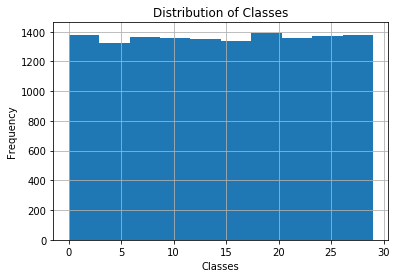

In [0]:
df_30['target'].hist()
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [0]:
df_30.groupby(['target'])['lables'].count()

**Plot of summary statistics by Class**

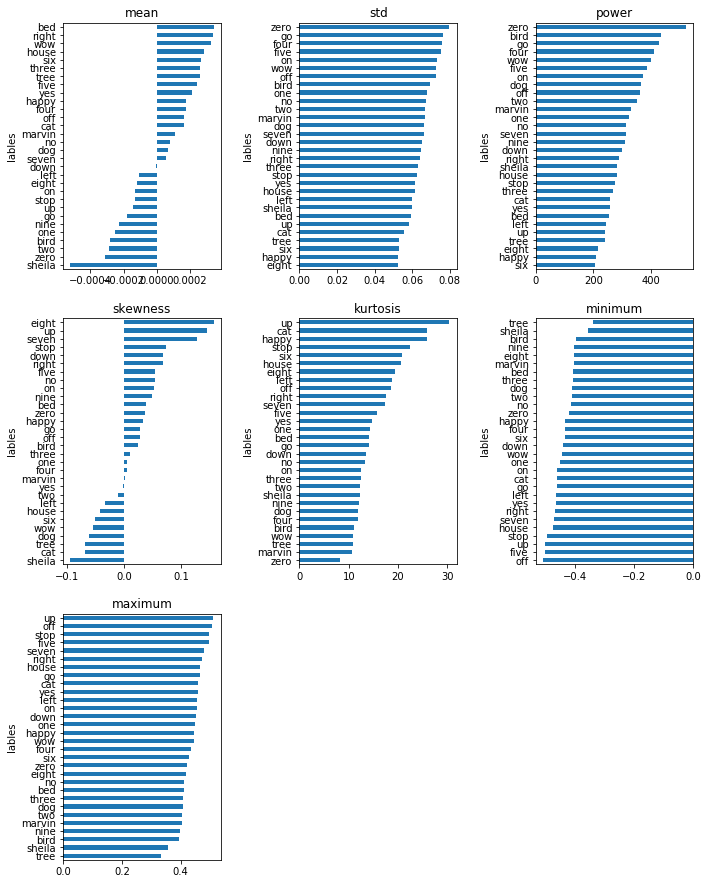

In [0]:
fig = plt.figure()
fig.tight_layout()
left  = 0.125  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax1.set_title('mean')
df_30.groupby('lables')['mean'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax1)
ax2.set_title('std')
df_30.groupby('lables')['std'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax2)
ax3.set_title('power')
df_30.groupby('lables')['power'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax3)
ax4.set_title('skewness')
df_30.groupby('lables')['skewness'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax4)
ax5.set_title('kurtosis')
df_30.groupby('lables')['kurtosis'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax5)
ax6.set_title('minimum')
df_30.groupby('lables')['minimum'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax6)
ax7.set_title('maximum')
df_30.groupby('lables')['maximum'].mean().sort_values().plot(kind='barh', figsize=(10,15),ax=ax7)
plt.subplots_adjust(left=left, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)


**Scatter Plots of Summary Statistics**

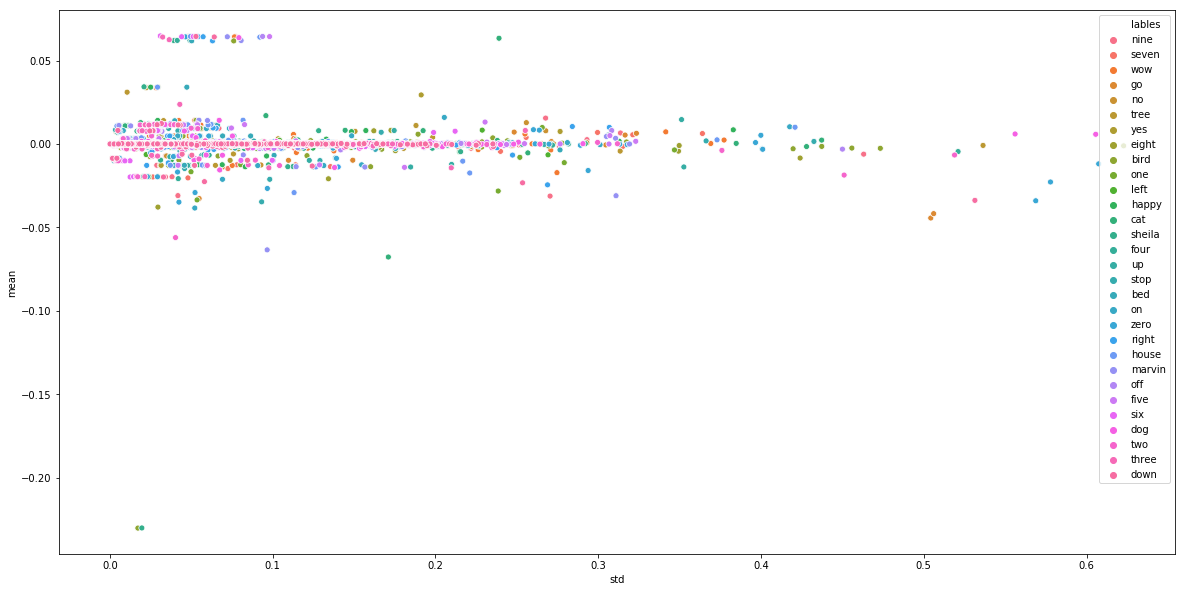

In [0]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x="std", y="mean", hue="lables", data=df_30)

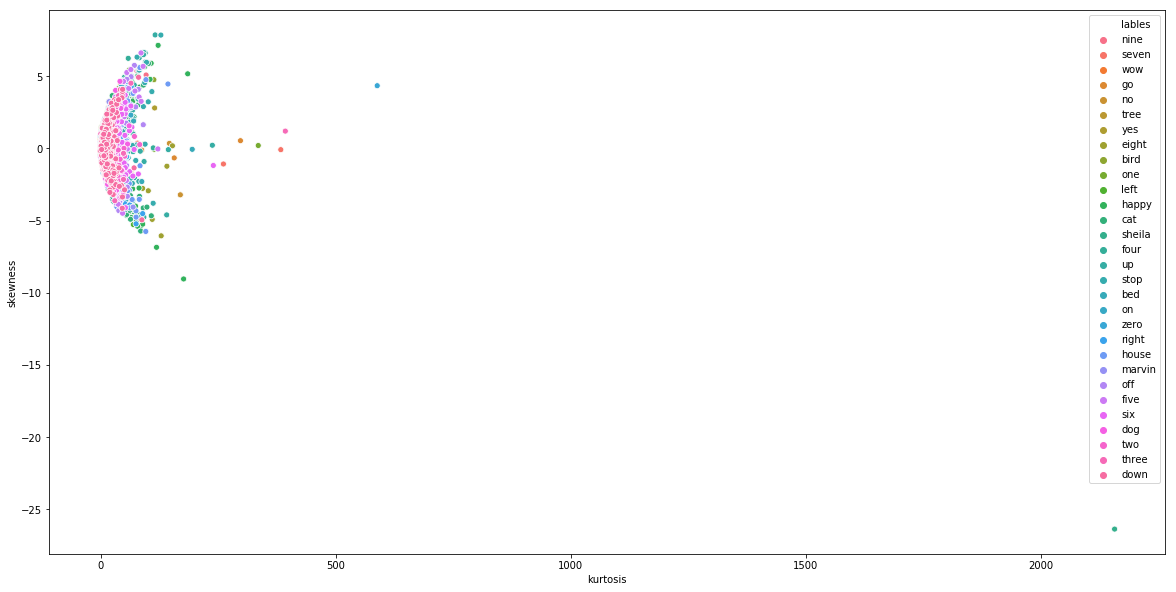

In [0]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x="kurtosis", y="skewness", hue="lables", data=df_30)

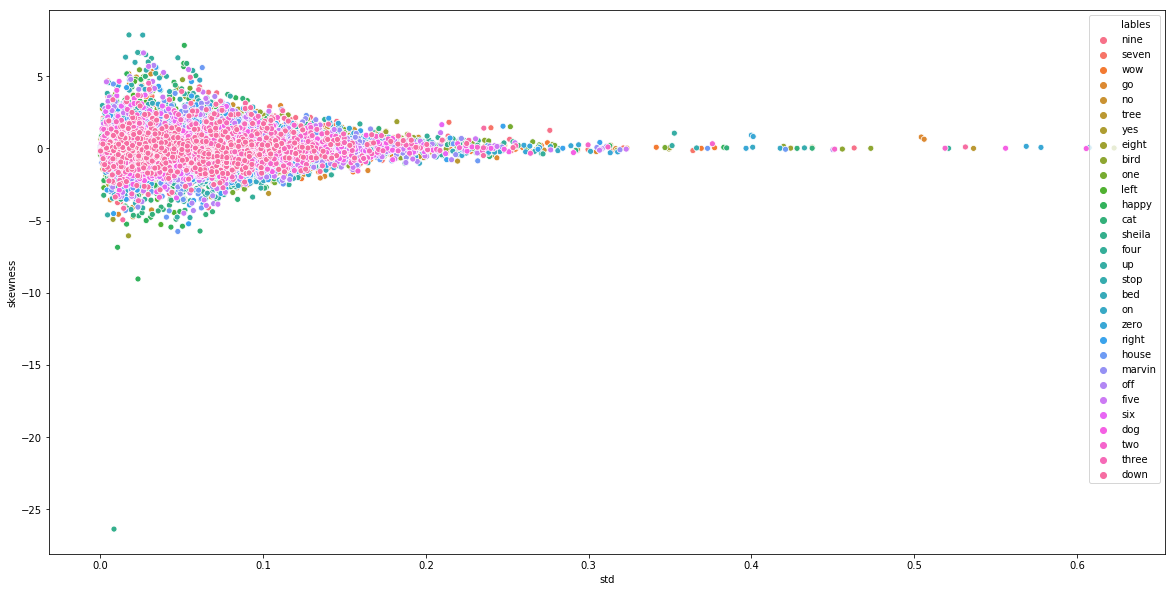

In [0]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x="std", y="skewness", hue="lables", data=df_30)

**Mean and Standard Deviation Distributions**
</p>The distributions for these summary statistics overlap significantly establish the fact that using simple statistical discriminators will be an inefficient means of classification </p>

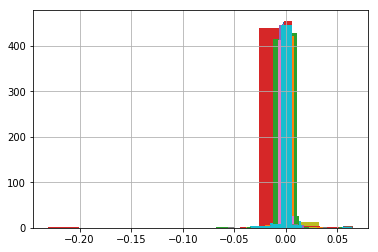

In [58]:
df_30.groupby(['target'])['mean'].hist()
plt.show()

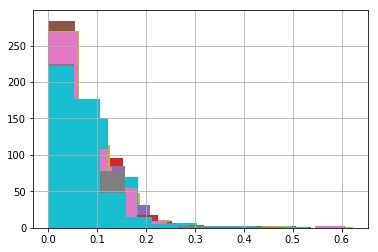

In [0]:
df_30.groupby(['target'])['std'].hist()
#plt.legend(df['target'].unique())
plt.show()

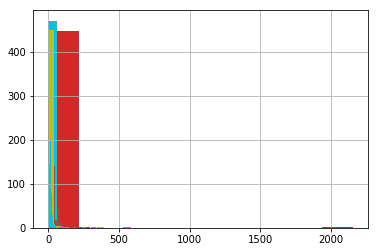

In [13]:
df_30.groupby(['target'])['kurtosis'].hist()
plt.show()

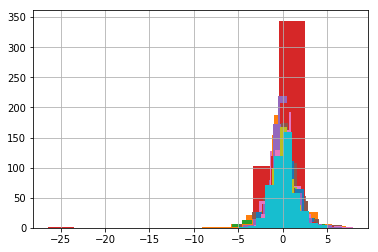

In [14]:
df_30.groupby(['target'])['skewness'].hist()
plt.show()

In [0]:
df_30.groupby(['target'])['mean'].hist()
plt.show()

**Violin Plots**
</p> Violin plots of the summary statistics distributions for each class also indicate that there is wide variance per class within each summary statistic does not bode well for classification on these features. However, since the goal is to determine which techniques are best for classification of the 30 audio classes analysis will proceed for unsupervised learning techniques will proceed using the features extracted above.

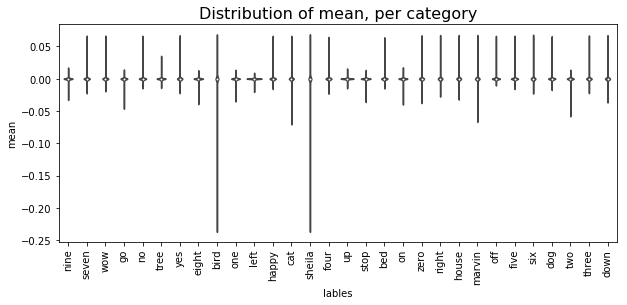

In [0]:
_, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(ax=ax, x=df_30['lables'], y="mean", data=df_30)
plt.xticks(rotation=90)
plt.title('Distribution of mean, per category', fontsize=16)
plt.show()

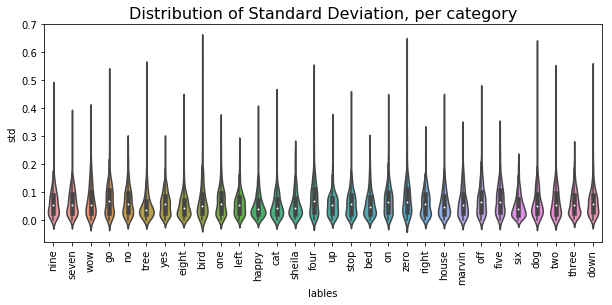

In [0]:
_, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(ax=ax, x="lables", y="std", data=df_30)
plt.xticks(rotation=90)
plt.title('Distribution of Standard Deviation, per category', fontsize=16)
plt.show()

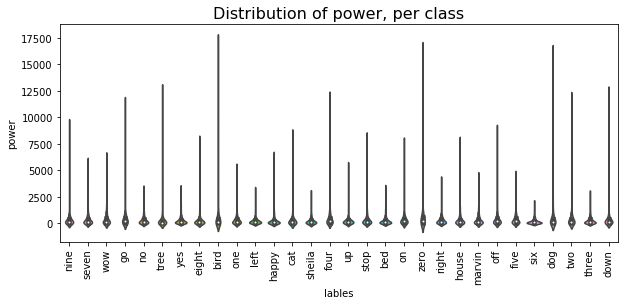

In [0]:
_, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(ax=ax, x="lables", y="power", data=df_30)
plt.xticks(rotation=90)
plt.title('Distribution of power, per class', fontsize=16)
plt.show()

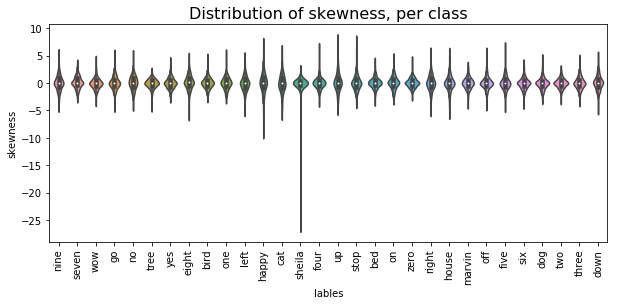

In [0]:
_, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(ax=ax, x="lables", y="skewness", data=df_30)
plt.xticks(rotation=90)
plt.title('Distribution of skewness, per class', fontsize=16)
plt.show()

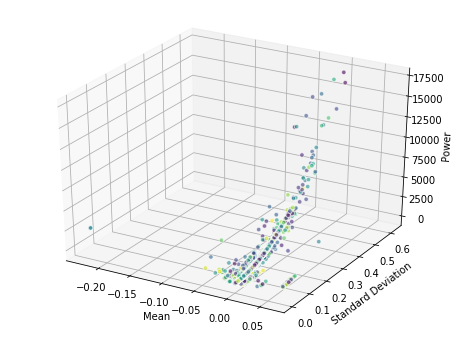

In [0]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
c = np.random.randint(1, 30, size=13623)
xs = df_30['mean']
ys = df_30['std']
zs = df_30['power']
ax.scatter(xs, ys, zs, c=c, alpha=0.6,edgecolors='w')

ax.set_xlabel('Mean')
ax.set_ylabel('Standard Deviation')
ax.set_zlabel('Power')

plt.show()

In [0]:
x,index=np.unique(df_30['target'],return_index=True)
x,index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([    0,   472,   937,  1376,  1832,  2265,  2703,  3168,  3620,
         4069,  4514,  4983,  5429,  5872,  6320,  6781,  7207,  7678,
         8119,  8578,  9049,  9512,  9959, 10406, 10872, 11335, 11798,
        12243, 12702, 13156]))

**Sound Samples Playback**

In [0]:
for cnt in range(0,30):
  title = df_30.loc[index[cnt]]['lables']
  print("Playing ", title)
  IPython.display.display(ipd.Audio(y_mfccs_target[index[cnt]],rate=44100))

Playing  nine


Playing  seven


Playing  wow


Playing  go


Playing  no


Playing  tree


Playing  yes


Playing  eight


Playing  bird


Playing  one


Playing  left


Playing  happy


Playing  cat


Playing  sheila


Playing  four


Playing  up


Playing  stop


Playing  bed


Playing  on


Playing  zero


Playing  right


Playing  house


Playing  marvin


Playing  off


Playing  five


Playing  six


Playing  dog


Playing  two


Playing  three


Playing  down


**Show visualization of waveforms in the time domain**

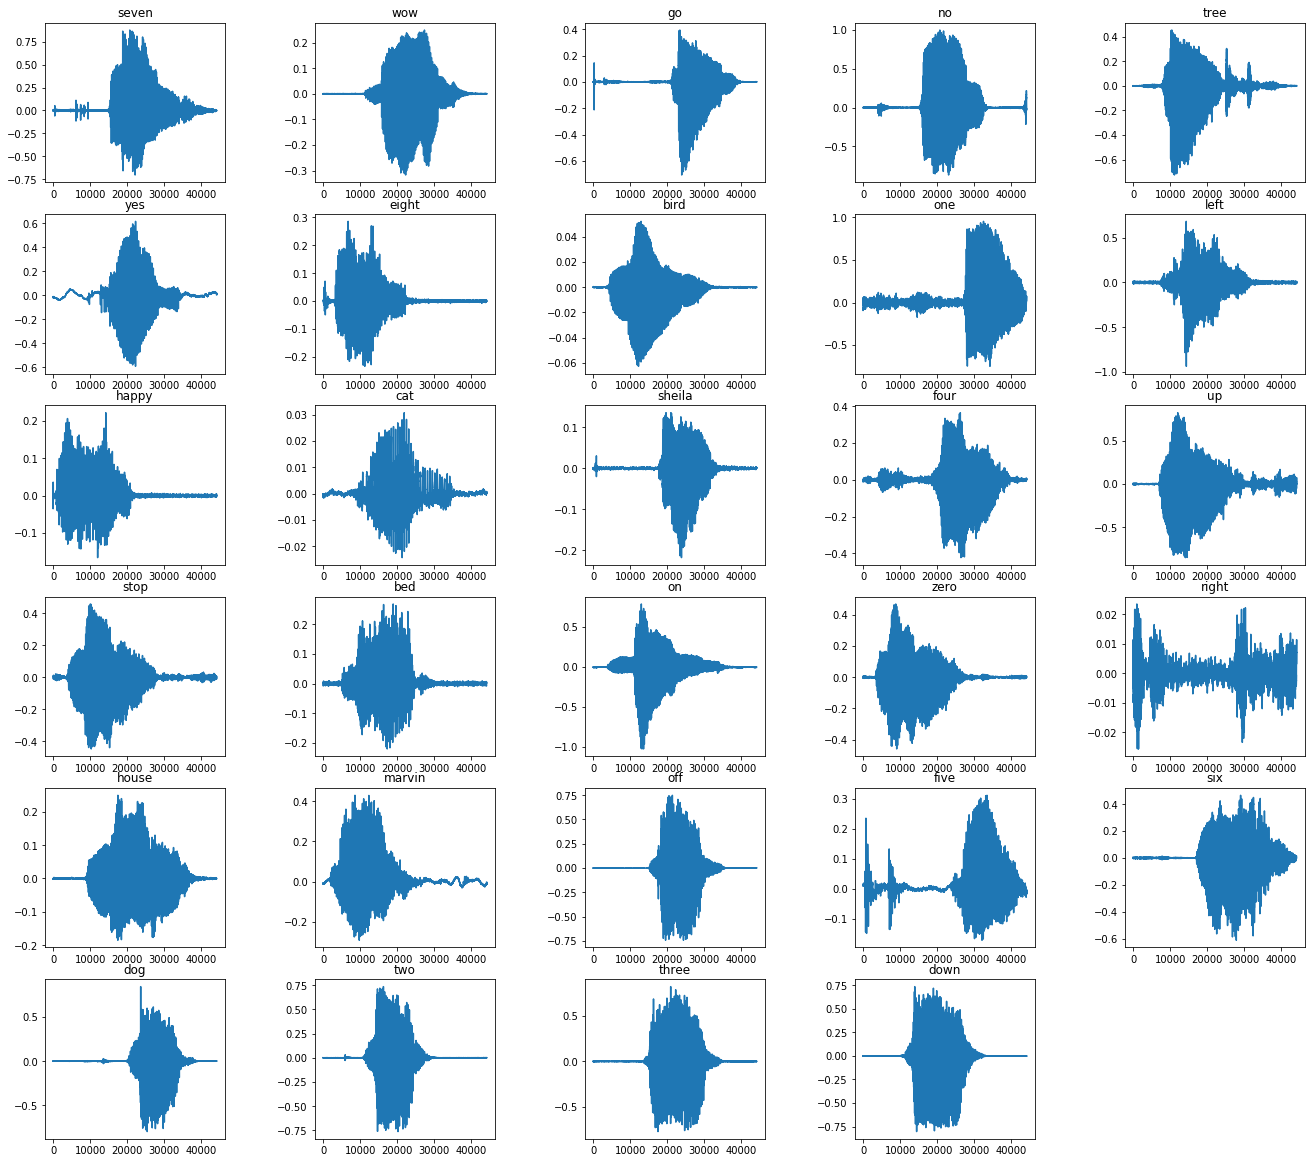

In [0]:

import numpy as np
import matplotlib.pyplot as plt

widths = np.arange(1, 256)
fig = plt.figure(figsize=(20, 20))

for i in range(1,30):
    plt.subplot(6,5,i)
    sig  = y_mfccs_target[i]
    title = df_30.loc[index[i]]['lables']
    plt.plot(sig)
    plt.title(title)
    
plt.subplots_adjust(left=None, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()

**Show visualization of time domain and MFCC spectrogram**

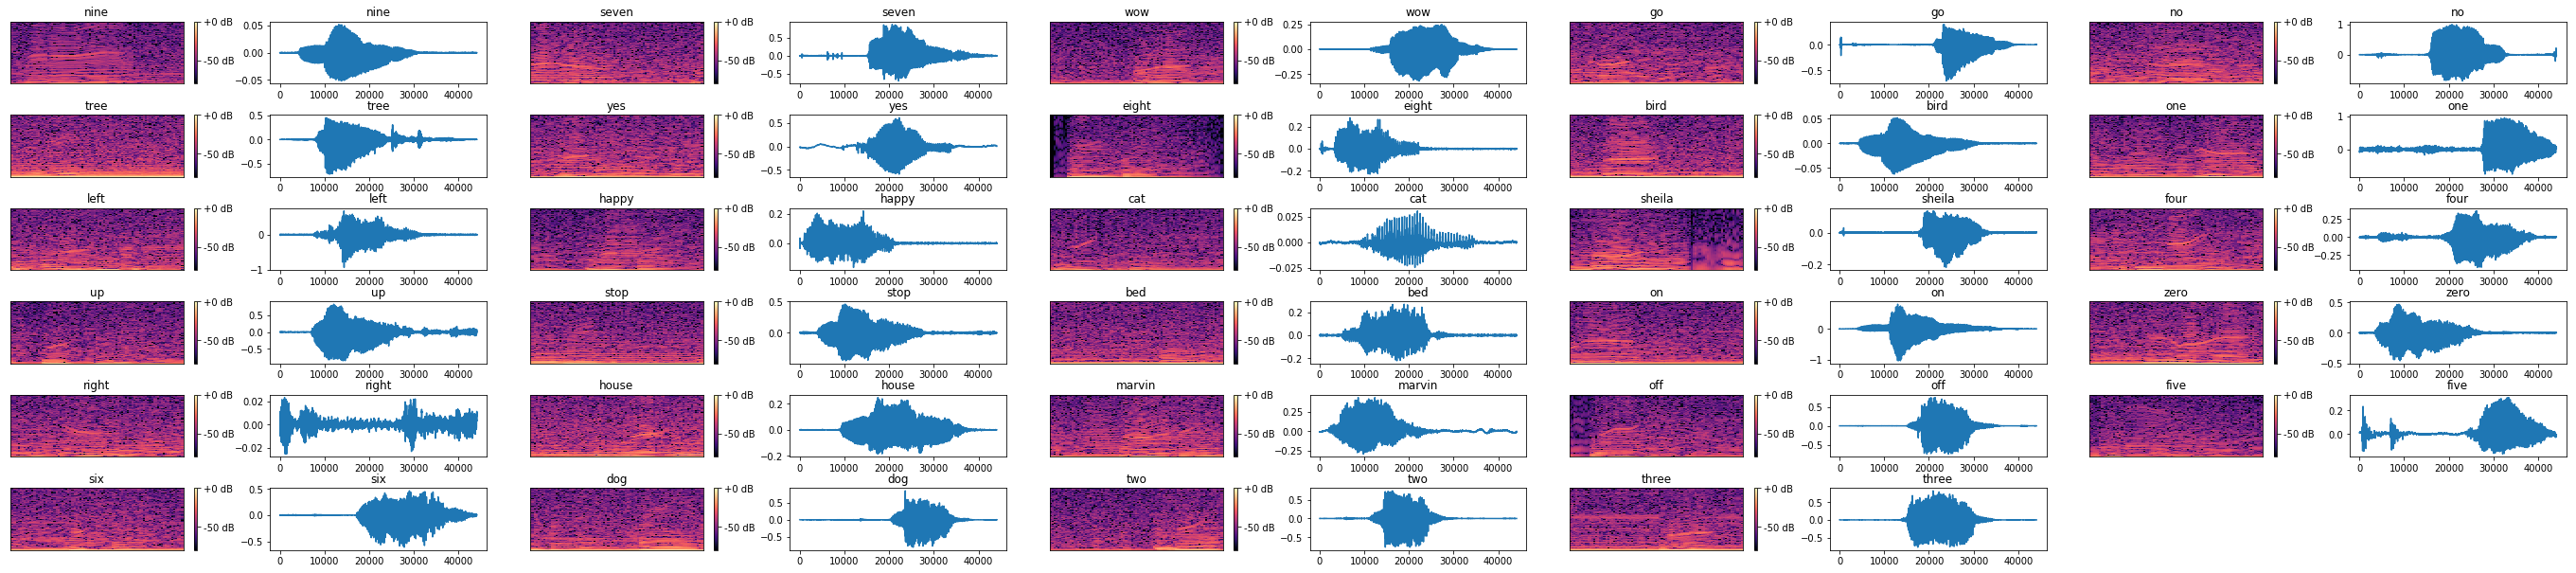

In [0]:
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
left  = 0.125  # the left side of the subplots of the figure
right = 2    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots

idx = 0
for i,cnt in zip(range(30),range(1,30)):
    idx = idx+1
    plt.subplot(6,10,idx)
    D = librosa.amplitude_to_db(X_mel_mfccs30[index[i]], ref=np.max)
    librosa.display.specshow(D)
    title = df_30.loc[index[i]]['lables']
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.subplot(6,10,idx+1)
    data = y_mfccs_target[i]
    plt.plot(data)
    plt.title(title)
    idx = idx+1
plt.subplots_adjust(left=None, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()

**Visualization of continuous wavelet transform (CWT) of time domain waveforms per class**
</p> The CWT is performed using the mexican hat wavelet as a basis function. The figures below show 1 representative sample per audio class. </p>

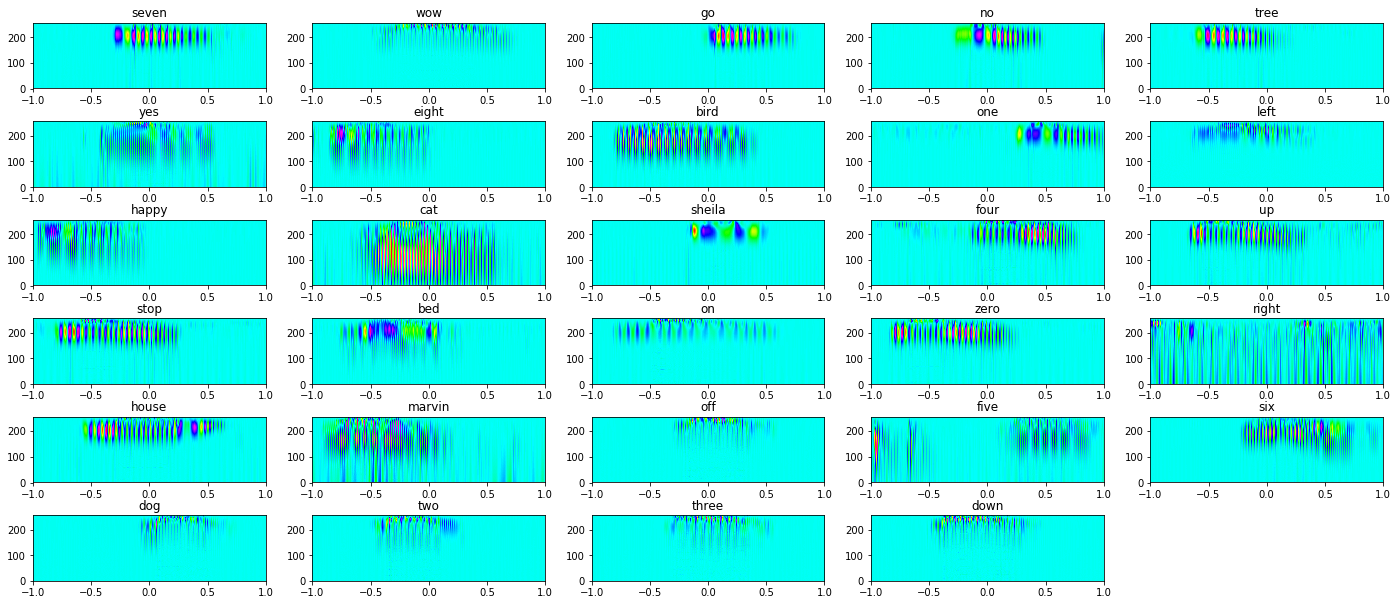

In [0]:

import pywt
import numpy as np
import matplotlib.pyplot as plt

widths = np.arange(1, 256)
fig = plt.figure(figsize=(10, 10))

for i in range(1,30):
    plt.subplot(6,5,i)
    sig  = y_mfccs_target[i]
    cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
    title = df_30.loc[index[i]]['lables']
    plt.title(title)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 256], cmap='hsv', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
    
plt.subplots_adjust(left=None, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()

**Load testing and training data to standard naming convention**

In [0]:
NewX = X_mean_mfccs30
yp = y_mfccs_labels
new_X_mel = X_mel_mfccs30
yp_mel = yp

**Create feature dataframe for use in Supervised Learning analysis**

In [0]:
df_data = df_30[['mean','std','kurtosis','skewness','power','minimum','maximum']]

In [0]:
data = pd.concat([pd.DataFrame(X_mean_mfccs30),df_data],axis=1)

In [0]:
NewX_train, NewX_test, Newy_train, Newy_test = train_test_split(data, yp, test_size=0.4, shuffle = True)
NewMel_train, NewMel_test, NewMely_train, NewMely_test = train_test_split(new_X_mel,yp_mel,test_size=0.4,shuffle=True)

In [0]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(NewX_train)
NewX_train = scaler.transform(NewX_train)
NewX_test = scaler.transform(NewX_test)

**Random Forest Classifier**
</p> The random forest classifier is used with the combined features of mfcc means and summary statistics which are then normalized in order to improve accuracy for the model. There are 100 estimators used in a one vs rest classifier with the random forest model

In [34]:
#clf = RandomForestClassifier(n_estimators = 300)
clf1 = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, max_depth=150, min_samples_leaf=100),n_jobs=-1)

#clf.fit(NewX_train, Newy_train)
clf1.fit(NewX_train, Newy_train)

#prediction = clf.predict(NewX_test)
prediction1 = clf1.predict(NewX_test)
print(classification_report(prediction1, Newy_test))

              precision    recall  f1-score   support

           0       0.05      0.25      0.08        40
           1       0.04      0.05      0.05       157
           2       0.08      0.05      0.06       278
           3       0.03      0.06      0.04       104
           4       0.04      0.24      0.07        29
           5       0.09      0.05      0.06       316
           6       0.07      0.05      0.06       227
           7       0.02      0.03      0.03       115
           8       0.05      0.04      0.05       209
           9       0.02      0.21      0.04        19
          10       0.07      0.06      0.06       212
          11       0.05      0.08      0.06       127
          12       0.35      0.09      0.14       604
          13       0.24      0.10      0.14       410
          14       0.08      0.09      0.09       171
          15       0.20      0.19      0.19       202
          16       0.08      0.07      0.08       202
          17       0.04    

**Classification Report**
</p> The classification report for the random forest classifier is shown below. The percision, accuracy and f-score are reported below. The random forest classifier does a poor job at discriminating agains the 30 sound classes in the dataset with an fscore of only 8%.

[0.17, 0.11, 0.13]
[0.07, 0.06, 0.06]
[0.06, 0.07, 0.07]
[0.09, 0.11, 0.1]
[0.09, 0.08, 0.09]
[0.06, 0.05, 0.05]
[0.09, 0.08, 0.08]
[0.07, 0.07, 0.07]
[0.09, 0.09, 0.09]
[0.07, 0.08, 0.08]
[0.07, 0.07, 0.07]
[0.11, 0.11, 0.11]
[0.12, 0.1, 0.11]
[0.2, 0.14, 0.17]
[0.07, 0.07, 0.07]
[0.21, 0.14, 0.17]
[0.11, 0.12, 0.11]
[0.05, 0.08, 0.06]
[0.09, 0.13, 0.11]
[0.13, 0.11, 0.12]
[0.08, 0.1, 0.09]
[0.06, 0.06, 0.06]
[0.08, 0.09, 0.08]
[0.1, 0.09, 0.09]
[0.06, 0.08, 0.07]
[0.15, 0.13, 0.14]
[0.04, 0.06, 0.05]
[0.08, 0.08, 0.08]
[0.07, 0.08, 0.08]
plotMat: [[0.17, 0.11, 0.13], [0.07, 0.06, 0.06], [0.06, 0.07, 0.07], [0.09, 0.11, 0.1], [0.09, 0.08, 0.09], [0.06, 0.05, 0.05], [0.09, 0.08, 0.08], [0.07, 0.07, 0.07], [0.09, 0.09, 0.09], [0.07, 0.08, 0.08], [0.07, 0.07, 0.07], [0.11, 0.11, 0.11], [0.12, 0.1, 0.11], [0.2, 0.14, 0.17], [0.07, 0.07, 0.07], [0.21, 0.14, 0.17], [0.11, 0.12, 0.11], [0.05, 0.08, 0.06], [0.09, 0.13, 0.11], [0.13, 0.11, 0.12], [0.08, 0.1, 0.09], [0.06, 0.06, 0.06], [0.08, 0

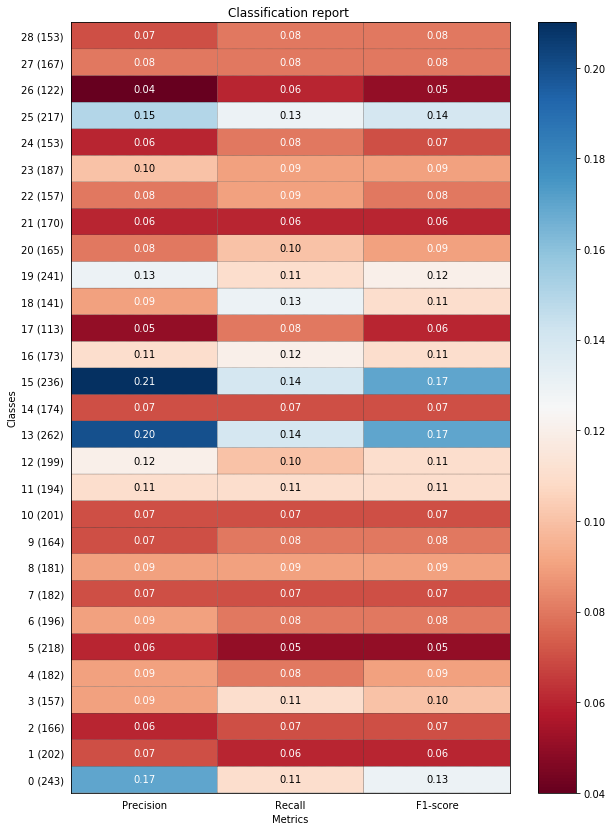

In [0]:
#@title

import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = ''' precision    recall  f1-score   support

           0       0.17      0.11      0.13       243
           1       0.07      0.06      0.06       202
           2       0.06      0.07      0.07       166
           3       0.09      0.11      0.10       157
           4       0.09      0.08      0.09       182
           5       0.06      0.05      0.05       218
           6       0.09      0.08      0.08       196
           7       0.07      0.07      0.07       182
           8       0.09      0.09      0.09       181
           9       0.07      0.08      0.08       164
          10       0.07      0.07      0.07       201
          11       0.11      0.11      0.11       194
          12       0.12      0.10      0.11       199
          13       0.20      0.14      0.17       262
          14       0.07      0.07      0.07       174
          15       0.21      0.14      0.17       236
          16       0.11      0.12      0.11       173
          17       0.05      0.08      0.06       113
          18       0.09      0.13      0.11       141
          19       0.13      0.11      0.12       241
          20       0.08      0.10      0.09       165
          21       0.06      0.06      0.06       170
          22       0.08      0.09      0.08       157
          23       0.10      0.09      0.09       187
          24       0.06      0.08      0.07       153
          25       0.15      0.13      0.14       217
          26       0.04      0.06      0.05       122
          27       0.08      0.08      0.08       167
          28       0.07      0.08      0.08       153
          29       0.08      0.11      0.09       134
'''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

**Confusion Matrix**
</p> Below is the Confusion Matrix for the Random Forest Classifier. It is seen that the classifier does not present good accuracy for the model using the features given </p>

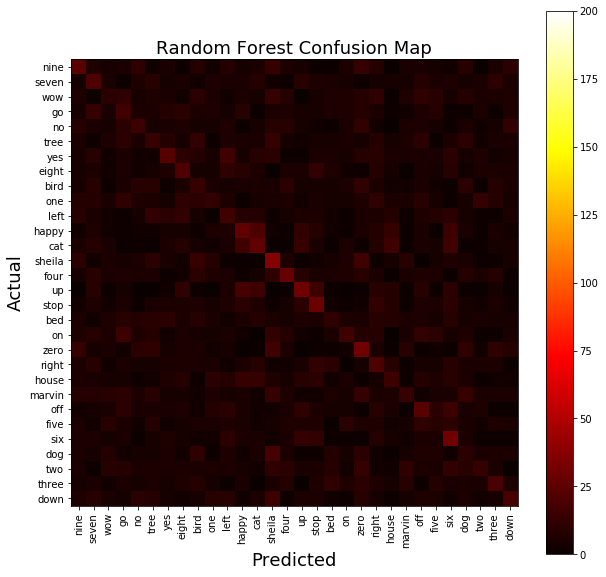

In [0]:
from sklearn.metrics import confusion_matrix
class_label = df_30.lables.unique().tolist()

matrix = confusion_matrix(Newy_test, prediction)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('Random Forest Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()

**SVM one vs Rest Classifier**

In [49]:
svm = OneVsRestClassifier(NuSVC(nu=.05,gamma='scale', kernel='rbf', decision_function_shape='ovr'),n_jobs=-1)
svmmodel = svm.fit(NewX_train, Newy_train)
svc_prediction = svmmodel.predict(NewX_test)

print ('fit to train new: ', svm.score(NewX_train, Newy_train))
print ('fit to test: ', svm.score(NewX_test, Newy_test))


fit to train new:  0.2717484399853175
fit to test:  0.04110091743119266


**SVM Classification Report**

In [50]:
print(classification_report(svc_prediction, Newy_test))

              precision    recall  f1-score   support

           0       0.01      0.02      0.01        87
           1       0.00      0.00      0.00        45
           2       0.19      0.03      0.05      1038
           3       0.03      0.05      0.04       114
           4       0.05      0.06      0.05       137
           5       0.03      0.07      0.05        85
           6       0.04      0.08      0.05        90
           7       0.03      0.06      0.04        88
           8       0.03      0.04      0.03       131
           9       0.02      0.02      0.02       147
          10       0.04      0.05      0.05       149
          11       0.09      0.02      0.04       753
          12       0.05      0.07      0.06       116
          13       0.02      0.07      0.04        58
          14       0.00      0.00      0.00        55
          15       0.03      0.11      0.04        44
          16       0.33      0.05      0.09      1100
          17       0.00    

[0.01, 0.02, 0.01]
[0.0, 0.0, 0.0]
[0.19, 0.03, 0.05]
[0.03, 0.05, 0.04]
[0.05, 0.06, 0.05]
[0.03, 0.07, 0.05]
[0.04, 0.08, 0.05]
[0.03, 0.06, 0.04]
[0.03, 0.04, 0.03]
[0.02, 0.02, 0.02]
[0.04, 0.05, 0.05]
[0.09, 0.02, 0.04]
[0.05, 0.07, 0.06]
[0.02, 0.07, 0.04]
[0.0, 0.0, 0.0]
[0.03, 0.11, 0.04]
[0.33, 0.05, 0.09]
[0.0, 0.0, 0.0]
[0.01, 0.03, 0.01]
[0.01, 0.11, 0.03]
[0.04, 0.04, 0.04]
[0.03, 0.11, 0.05]
[0.03, 0.08, 0.04]
[0.0, 0.03, 0.01]
[0.02, 0.02, 0.02]
[0.04, 0.03, 0.03]
[0.01, 0.03, 0.02]
[0.02, 0.06, 0.03]
[0.02, 0.03, 0.03]
[0.04, 0.07, 0.05]
plotMat: [[0.01, 0.02, 0.01], [0.0, 0.0, 0.0], [0.19, 0.03, 0.05], [0.03, 0.05, 0.04], [0.05, 0.06, 0.05], [0.03, 0.07, 0.05], [0.04, 0.08, 0.05], [0.03, 0.06, 0.04], [0.03, 0.04, 0.03], [0.02, 0.02, 0.02], [0.04, 0.05, 0.05], [0.09, 0.02, 0.04], [0.05, 0.07, 0.06], [0.02, 0.07, 0.04], [0.0, 0.0, 0.0], [0.03, 0.11, 0.04], [0.33, 0.05, 0.09], [0.0, 0.0, 0.0], [0.01, 0.03, 0.01], [0.01, 0.11, 0.03], [0.04, 0.04, 0.04], [0.03, 0.11, 0.05],

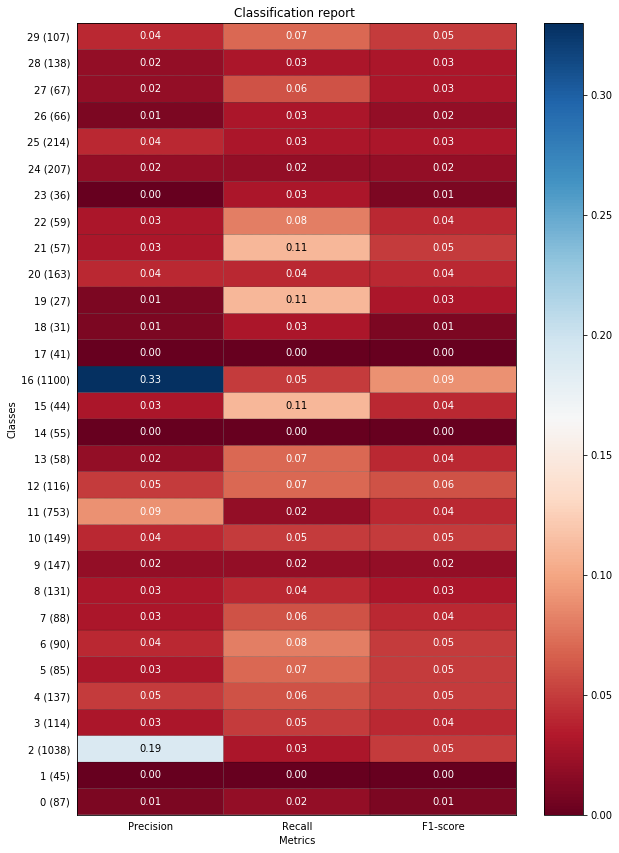

In [51]:
#@title


import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = '''  
             precision    recall  f1-score   support

           0       0.01      0.02      0.01        87
           1       0.00      0.00      0.00        45
           2       0.19      0.03      0.05      1038
           3       0.03      0.05      0.04       114
           4       0.05      0.06      0.05       137
           5       0.03      0.07      0.05        85
           6       0.04      0.08      0.05        90
           7       0.03      0.06      0.04        88
           8       0.03      0.04      0.03       131
           9       0.02      0.02      0.02       147
          10       0.04      0.05      0.05       149
          11       0.09      0.02      0.04       753
          12       0.05      0.07      0.06       116
          13       0.02      0.07      0.04        58
          14       0.00      0.00      0.00        55
          15       0.03      0.11      0.04        44
          16       0.33      0.05      0.09      1100
          17       0.00      0.00      0.00        41
          18       0.01      0.03      0.01        31
          19       0.01      0.11      0.03        27
          20       0.04      0.04      0.04       163
          21       0.03      0.11      0.05        57
          22       0.03      0.08      0.04        59
          23       0.00      0.03      0.01        36
          24       0.02      0.02      0.02       207
          25       0.04      0.03      0.03       214
          26       0.01      0.03      0.02        66
          27       0.02      0.06      0.03        67
          28       0.02      0.03      0.03       138
          29       0.04      0.07      0.05       107

'''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

**SVM Confusion Matrix**

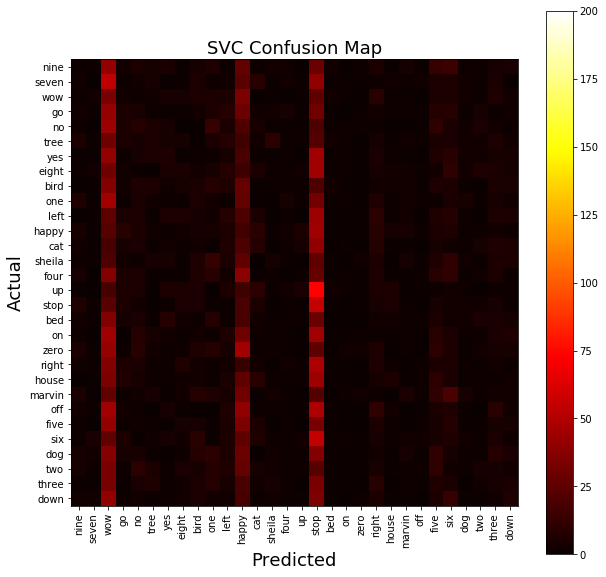

In [53]:
from sklearn.metrics import confusion_matrix
class_label = df_30.lables.unique().tolist()

matrix = confusion_matrix(Newy_test, svc_prediction)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('SVC Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()

In [0]:
NM_test  = np.zeros(shape=(NewMel_test.shape[0] ,NewMel_test.shape[1] ,NewMel_test.shape[2]))
NM_train = np.zeros(shape=(NewMel_train.shape[0],NewMel_train.shape[1],NewMel_train.shape[2]))
NMy_test1 = to_categorical(NewMely_test)
NMy_train1= to_categorical(NewMely_train)


In [0]:
for i in range(0,NewMel_test.shape[0]):
    NM_test[i][:][:]=NewMel_test[i][:]


for i in range(0,NewMel_train.shape[0]):
    NM_train[i][:][:]=NewMel_train[i][:]

In [0]:
NM_test   = NM_test.reshape(NewMel_test.shape[0] ,NewMel_test.shape[1] ,NewMel_test.shape[2],1)
NM_train  = NM_train.reshape(NewMel_train.shape[0],NewMel_train.shape[1],NewMel_train.shape[2],1)

In [0]:
#@title
np.save('NM_test',NM_test)
np.save('NM_train',NM_train)
np.save('NMy_test1',NMy_test1)
np.save('NMy_train1',NMy_train1)

In [0]:
NM_test   = np.load('NM_test.npy')
NM_train  = np.load('NM_train.npy')
NMy_test1 = np.load('NMy_test1.npy')
NMy_train1= np.load('NMy_train1.npy')

**Convolutional Neural Network Architecture 1**

In [0]:
def conv_1d_model(nclass=30):
    
    inp = Input(shape=(44100,1))
    x = Convolution1D(1,16, activation=relu, padding="valid")(inp)
    x = Convolution1D(1,16, activation=relu, padding="valid")(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(16)(x)
    x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(4)(x)
    x = Dropout(rate=0.1)(x)
    
    #x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    #x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    #x = MaxPool1D(4)(x)
    #x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    x = Convolution1D(1,32, activation=relu, padding="valid")(x)
    x = BatchNormalization()(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(rate=0.2)(x)

    x = Dense(64, activation=relu)(x)
    x = Dense(1028, activation=relu)(x)
    out = Dense(nclass, activation=softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = optimizers.Adam(.0001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
    return model

In [0]:
model1D = conv_1d_model()

In [0]:
model1D.summary()

**Convolutional Neural Network Architecture 1 Model**

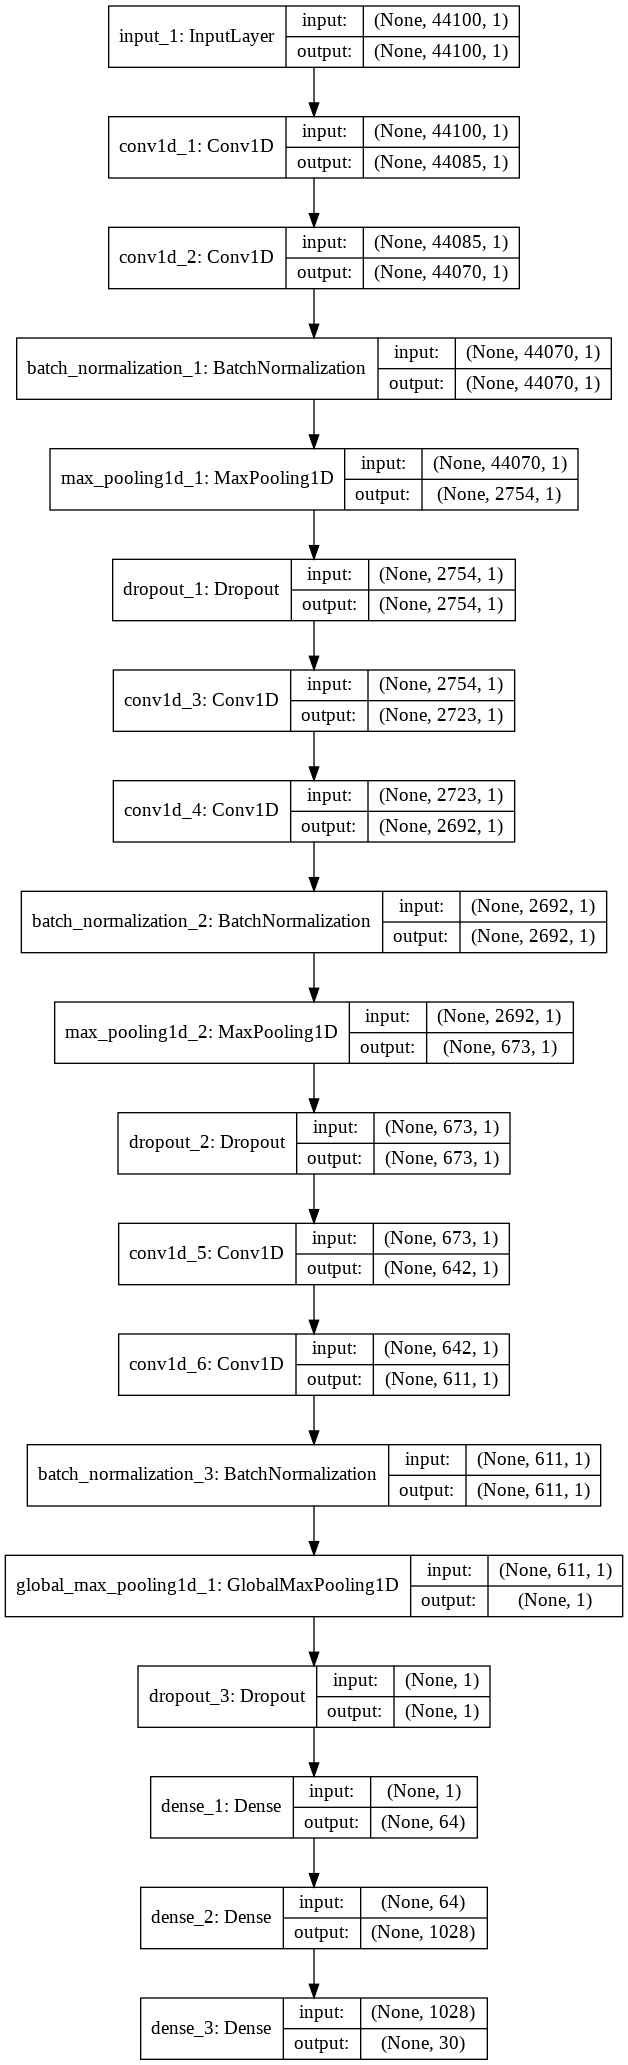

In [0]:
from keras.utils import plot_model
plot_model(model1D, show_shapes=True, show_layer_names=True)

In [0]:
data_1D = np.expand_dims(y_mfccs_target,axis = 2).reshape(13623,44100,1)
data_1D.shape

(13623, 44100, 1)

In [0]:
NewX1D_train, NewX1D_test, Newy1D_train, Newy1D_test = train_test_split(data_1D, to_categorical(yp), test_size=0.4, shuffle = True)

In [0]:
history_1D = model1D.fit(NewX1D_train, Newy1D_train, validation_data=(NewX1D_test, Newy1D_test),batch_size=512, epochs=100)

**CNN Architecture 1 Classification Report**

In [0]:
model1D_pred = np.argmax(model1D.predict(NewX1D_test), axis=1, out=None)
model1D_labels = np.argmax(Newy1D_test,axis=1,out=None)
print(classification_report( model1D_labels,model1D_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       187
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       201
           5       0.00      0.00      0.00       198
           6       0.00      0.00      0.00       184
           7       0.00      0.00      0.00       175
           8       0.00      0.00      0.00       184
           9       0.04      0.04      0.04       172
          10       0.00      0.00      0.00       193
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       187
          13       0.08      0.06      0.07       187
          14       0.00      0.00      0.00       162
          15       0.00      0.00      0.00       171
          16       0.00      0.00      0.00       208
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.06, 0.17, 0.09]
[0.08, 0.1, 0.09]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.07, 0.72, 0.13]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.01, 0.01, 0.01]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.05, 0.5, 0.08]
plotMat: [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.06, 0.17, 0.09], [0.08, 0.1, 0.09], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.07, 0.72, 0.13], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.01, 0.01, 0.01], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.05, 0.5, 0.08]]
support: [181, 195, 166, 207, 169, 187, 

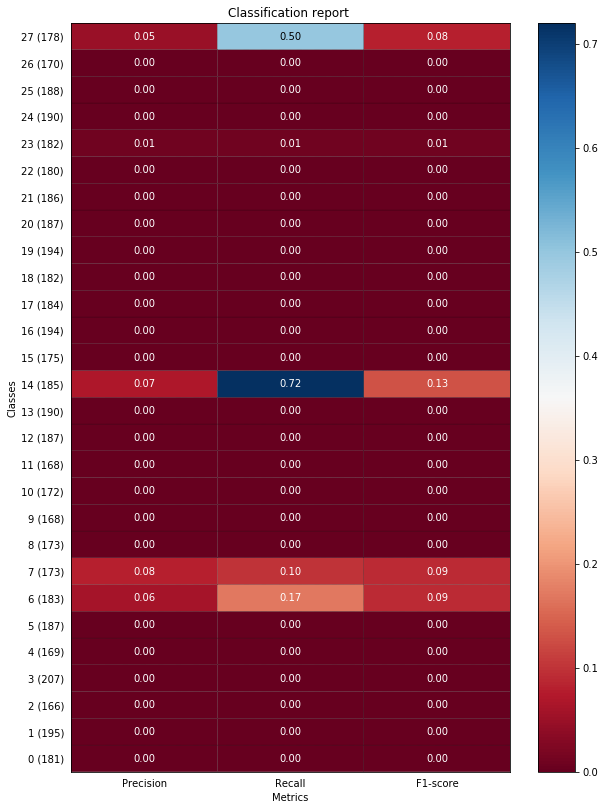

In [35]:
#@title

import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = '''precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.00      0.00      0.00       195
           2       0.00      0.00      0.00       166
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       187
           6       0.06      0.17      0.09       183
           7       0.08      0.10      0.09       173
           8       0.00      0.00      0.00       173
           9       0.00      0.00      0.00       168
          10       0.00      0.00      0.00       172
          11       0.00      0.00      0.00       168
          12       0.00      0.00      0.00       187
          13       0.00      0.00      0.00       190
          14       0.07      0.72      0.13       185
          15       0.00      0.00      0.00       175
          16       0.00      0.00      0.00       194
          17       0.00      0.00      0.00       184
          18       0.00      0.00      0.00       182
          19       0.00      0.00      0.00       194
          20       0.00      0.00      0.00       187
          21       0.00      0.00      0.00       186
          22       0.00      0.00      0.00       180
          23       0.01      0.01      0.01       182
          24       0.00      0.00      0.00       190
          25       0.00      0.00      0.00       188
          26       0.00      0.00      0.00       170
          27       0.05      0.50      0.08       178
          28       0.00      0.00      0.00       177
          29       0.05      0.18      0.07       179'''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

**CNN Architecture 1 Correlation Matrix**

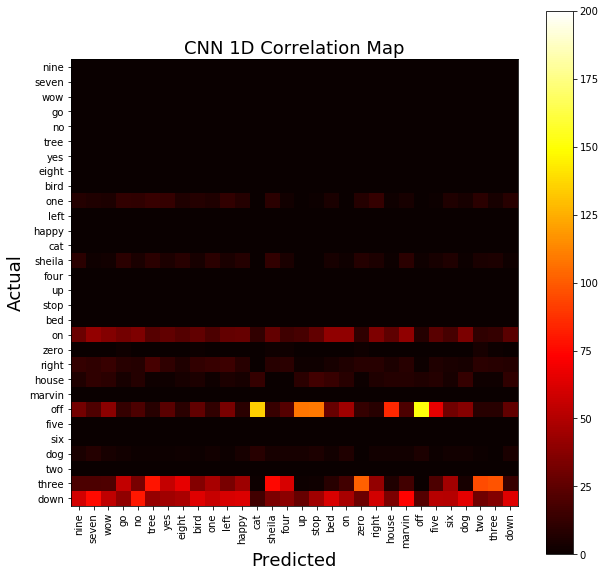

In [51]:
class_label = df_30.lables.unique().tolist()

matrix = confusion_matrix(model1D_pred, model1D_labels)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('CNN 1D Correlation Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()

In [0]:
np.unique(model1D_pred,return_counts=True)

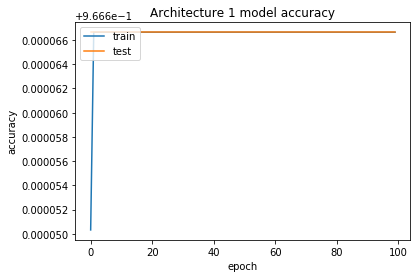

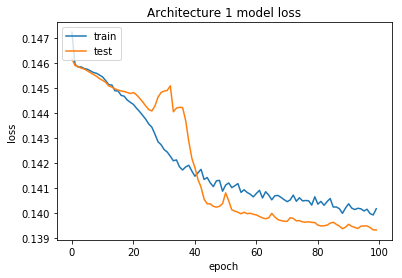

In [0]:
# summarize history for accuracy
plt.plot(history_1D.history['acc'])
plt.plot(history_1D.history['val_acc'])
plt.title('Architecture 1 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1D.history['loss'])
plt.plot(history_1D.history['val_loss'])
plt.title('Architecture 1 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pickle
filename = 'CNN_1D_model.sav'
filename1 = 'History_CNN_1D.sav'
pickle.dump(model1D, open(filename, 'wb'))
np.save(filename1,history_1D)

In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [0]:
model = Sequential()
#add model layers
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(NM_test.shape[1] ,NM_test.shape[2],1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=3, activation= 'relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(30, activation='softmax'))

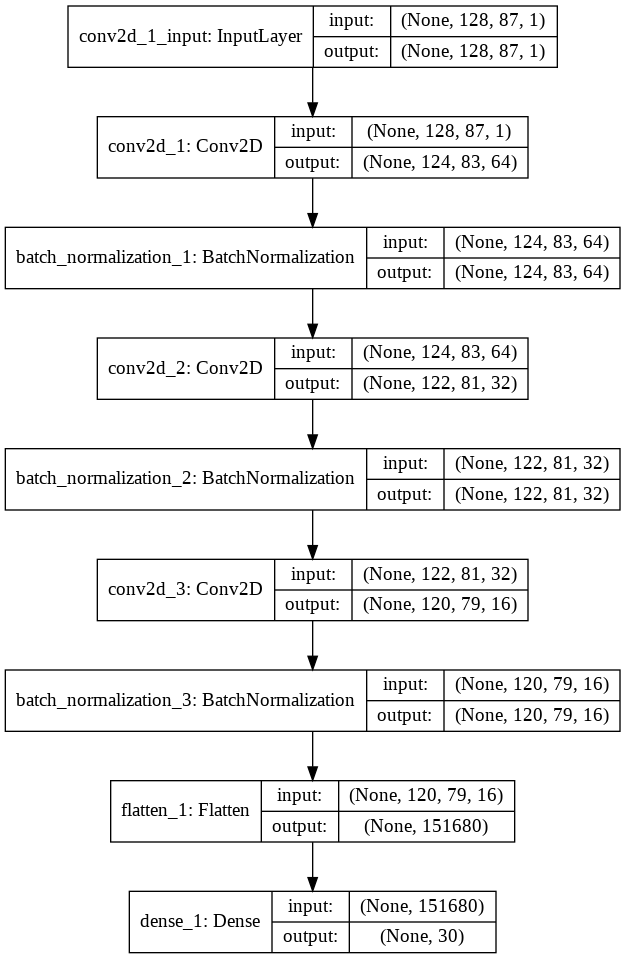

In [0]:
plot_model(vanilla_model, show_shapes=True, show_layer_names=True)

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_vanilla = model.fit(NM_train, NMy_train1, validation_data=(NM_test, NMy_test1),batch_size=256, epochs=100)

In [49]:
mel_pred = np.argmax(vanilla_model.predict(NM_test), axis=1, out=None)
mel_labels = np.argmax(NMy_test1,axis=1,out=None)
print(classification_report(mel_labels,mel_pred))

              precision    recall  f1-score   support

           0       0.57      0.02      0.04       181
           1       0.16      0.43      0.23       183
           2       1.00      0.01      0.01       165
           3       0.50      0.01      0.01       176
           4       0.00      0.00      0.00       184
           5       0.33      0.02      0.03       168
           6       0.10      0.81      0.18       199
           7       0.32      0.29      0.30       161
           8       0.70      0.45      0.55       185
           9       0.06      0.58      0.12       184
          10       0.50      0.01      0.01       183
          11       0.36      0.08      0.13       172
          12       0.36      0.02      0.04       176
          13       0.60      0.52      0.55       188
          14       0.00      0.00      0.00       191
          15       0.38      0.02      0.04       159
          16       0.88      0.08      0.14       193
          17       0.16    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.57, 0.02, 0.04]
[0.16, 0.43, 0.23]
[1.0, 0.01, 0.01]
[0.5, 0.01, 0.01]
[0.0, 0.0, 0.0]
[0.33, 0.02, 0.03]
[0.1, 0.81, 0.18]
[0.32, 0.29, 0.3]
[0.7, 0.45, 0.55]
[0.06, 0.58, 0.12]
[0.5, 0.01, 0.01]
[0.36, 0.08, 0.13]
[0.36, 0.02, 0.04]
[0.6, 0.52, 0.55]
[0.0, 0.0, 0.0]
[0.38, 0.02, 0.04]
[0.88, 0.08, 0.14]
[0.16, 0.13, 0.15]
[0.18, 0.18, 0.18]
[0.61, 0.06, 0.12]
[0.11, 0.25, 0.16]
[1.0, 0.01, 0.02]
[0.22, 0.1, 0.14]
[0.5, 0.01, 0.02]
[0.0, 0.0, 0.0]
[0.45, 0.44, 0.45]
[0.0, 0.0, 0.0]
[1.0, 0.01, 0.02]
plotMat: [[0.57, 0.02, 0.04], [0.16, 0.43, 0.23], [1.0, 0.01, 0.01], [0.5, 0.01, 0.01], [0.0, 0.0, 0.0], [0.33, 0.02, 0.03], [0.1, 0.81, 0.18], [0.32, 0.29, 0.3], [0.7, 0.45, 0.55], [0.06, 0.58, 0.12], [0.5, 0.01, 0.01], [0.36, 0.08, 0.13], [0.36, 0.02, 0.04], [0.6, 0.52, 0.55], [0.0, 0.0, 0.0], [0.38, 0.02, 0.04], [0.88, 0.08, 0.14], [0.16, 0.13, 0.15], [0.18, 0.18, 0.18], [0.61, 0.06, 0.12], [0.11, 0.25, 0.16], [1.0, 0.01, 0.02], [0.22, 0.1, 0.14], [0.5, 0.01, 0.02], [0.0, 0.0, 0.0], 

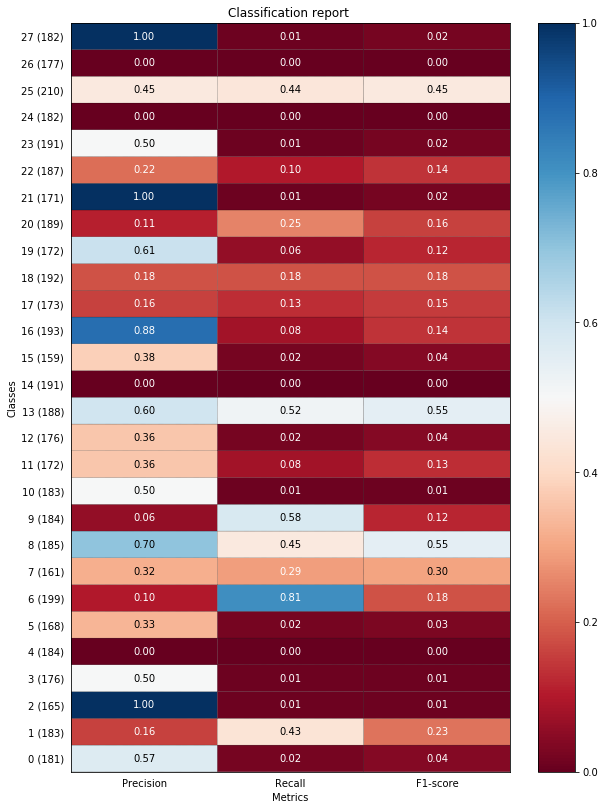

In [55]:
#@title


import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = '''precision    recall  f1-score   support

           0       0.57      0.02      0.04       181
           1       0.16      0.43      0.23       183
           2       1.00      0.01      0.01       165
           3       0.50      0.01      0.01       176
           4       0.00      0.00      0.00       184
           5       0.33      0.02      0.03       168
           6       0.10      0.81      0.18       199
           7       0.32      0.29      0.30       161
           8       0.70      0.45      0.55       185
           9       0.06      0.58      0.12       184
          10       0.50      0.01      0.01       183
          11       0.36      0.08      0.13       172
          12       0.36      0.02      0.04       176
          13       0.60      0.52      0.55       188
          14       0.00      0.00      0.00       191
          15       0.38      0.02      0.04       159
          16       0.88      0.08      0.14       193
          17       0.16      0.13      0.15       173
          18       0.18      0.18      0.18       192
          19       0.61      0.06      0.12       172
          20       0.11      0.25      0.16       189
          21       1.00      0.01      0.02       171
          22       0.22      0.10      0.14       187
          23       0.50      0.01      0.02       191
          24       0.00      0.00      0.00       182
          25       0.45      0.44      0.45       210
          26       0.00      0.00      0.00       177
          27       1.00      0.01      0.02       182
          28       0.40      0.35      0.37       177
          29       0.27      0.02      0.04       199'''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

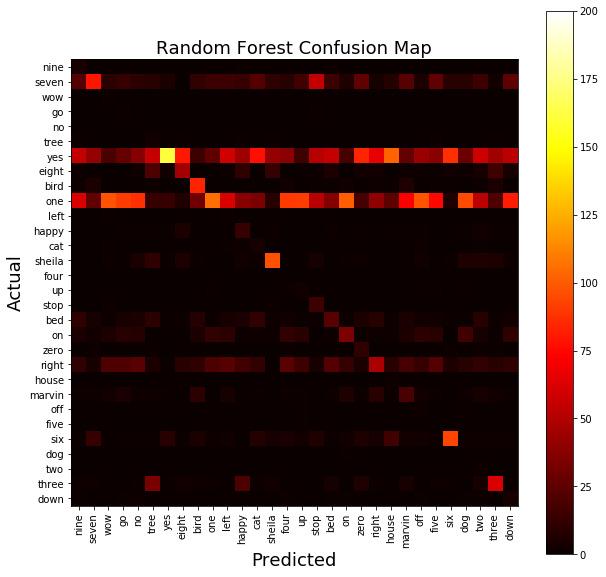

In [53]:
class_label = df_30.lables.unique().tolist()

matrix = confusion_matrix(mel_pred, mel_labels)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('CNN 2D model 1 Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()

In [0]:
import pickle
filename = 'history_vanilla.sav'
filename1 = 'vanilla_model.sav'
pickle.dump(history_vanilla, open(filename, 'wb'))
pickle.dump(model, open(filename1, 'wb'))

In [0]:
import pickle
history_vanilla = pickle.load(open('history_vanilla.sav', 'rb'))

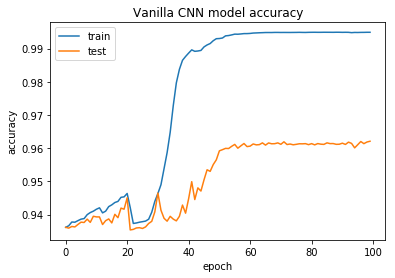

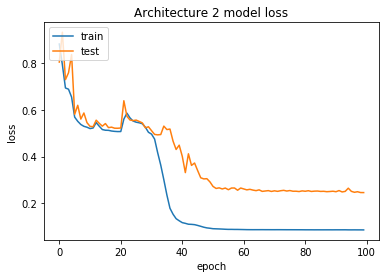

In [48]:
# summarize history for accuracy
plt.plot(history_vanilla.history['acc'])
plt.plot(history_vanilla.history['val_acc'])
plt.title('Vanilla CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_vanilla.history['loss'])
plt.plot(history_vanilla.history['val_loss'])
plt.title('Architecture 2 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
vgg = Sequential()

vgg.add(Conv2D(32, (3, 3), activation='relu',input_shape=(NM_test.shape[1] ,NM_test.shape[2], 1)))
vgg.add(BatchNormalization())
vgg.add(Conv2D(32, (3, 3), activation='relu'))
vgg.add(BatchNormalization())
vgg.add(MaxPooling2D(pool_size=(2, 2)))
vgg.add(Dropout(0.25))

vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(BatchNormalization())
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(BatchNormalization())
vgg.add(MaxPooling2D(pool_size=(2, 2)))
vgg.add(Dropout(0.25))

vgg.add(Flatten())
vgg.add(Dense(256, activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(30, activation='softmax'))
vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

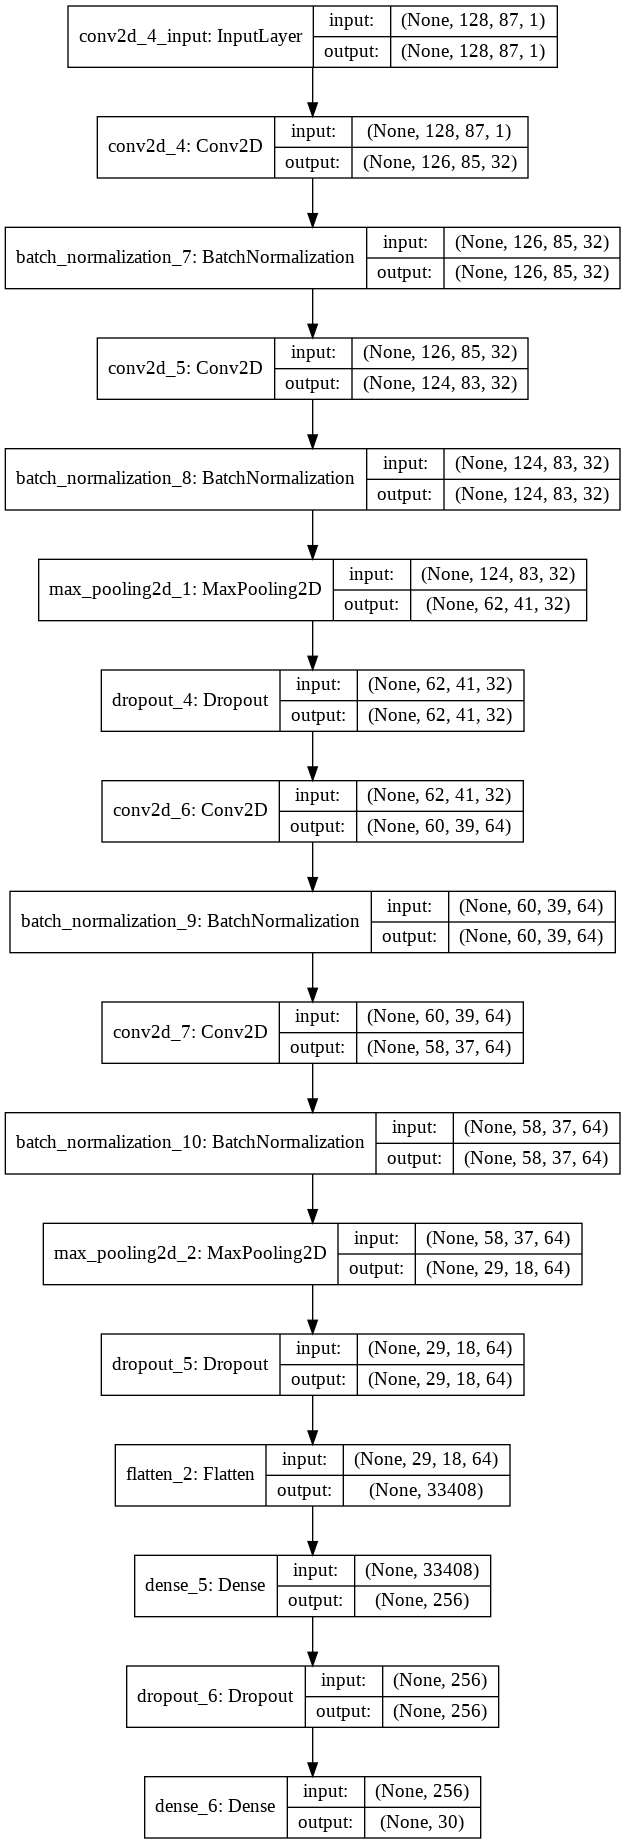

In [56]:
plot_model(vgg, show_shapes=True, show_layer_names=True)

In [57]:
history_vgg = vgg.fit(NM_train, NMy_train1, validation_data=(NM_test, NMy_test1),batch_size=250, epochs=100)

Train on 8173 samples, validate on 5450 samples
Epoch 1/100
8173/8173 [==============================] - 26s 3ms/step - loss: 0.2318 - acc: 0.9609 - val_loss: 0.1461 - val_acc: 0.9667
Epoch 2/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 3/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 4/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 5/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 6/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 7/100
8173/8173 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9667


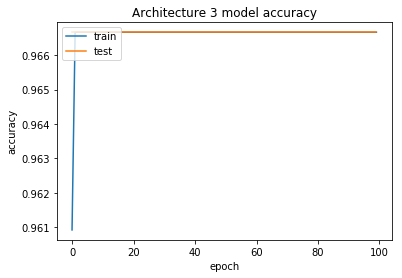

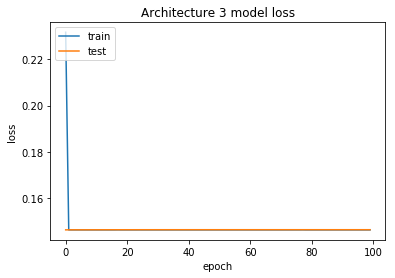

In [59]:
# summarize history for accuracy
plt.plot(history_vgg.history['acc'])
plt.plot(history_vgg.history['val_acc'])
plt.title('Architecture 3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Architecture 3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
mel_pred = np.argmax(vgg.predict(NM_test), axis=1, out=None)
mel_labels = np.argmax(NMy_test1,axis=1,out=None)
print(classification_report(mel_labels,mel_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.00      0.00      0.00       183
           2       0.00      0.00      0.00       165
           3       0.00      0.00      0.00       176
           4       0.00      0.00      0.00       184
           5       0.00      0.00      0.00       168
           6       0.00      0.00      0.00       199
           7       0.00      0.00      0.00       161
           8       0.00      0.00      0.00       185
           9       0.00      0.00      0.00       184
          10       0.00      0.00      0.00       183
          11       0.00      0.00      0.00       172
          12       0.00      0.00      0.00       176
          13       0.00      0.00      0.00       188
          14       0.00      0.00      0.00       191
          15       0.00      0.00      0.00       159
          16       0.00      0.00      0.00       193
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**CNN Architecture 3**

In [0]:

# define the standalone classifier model
def define_classifier2(in_shape=(NM_test.shape[1] ,NM_test.shape[2], 1)):
        model = Sequential()
        
        #add Gaussian noise to prevent classifier overfitting
        model.add(GaussianNoise(0.9, input_shape = [NM_test.shape[1] ,NM_test.shape[2], 1]))
        
        #256x256x3 Image
        model.add(Conv2D(filters = 8, kernel_size = 3, strides= (2,2), padding = 'same',input_shape=in_shape))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #128x128x8
        model.add(Conv2D(filters = 16, kernel_size = 3, strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        model.add(AveragePooling2D())
        
        #64x64x16
        model.add(Conv2D(filters = 32, kernel_size = 3, strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #32x32x32
        model.add(Conv2D(filters = 64, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #16x16x64
        model.add(Conv2D(filters = 128, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #8x8x128
        model.add(Conv2D(filters = 256, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #4x4x256
        model.add(Flatten())
        
        #256
        model.add(Dense(256))
        #model.add(LeakyReLU(0.2))
        

        model.add(Dense(30,activation = 'softmax')) #
        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model


In [62]:
model1 = define_classifier2()

**CNN Architecture 3 Model**

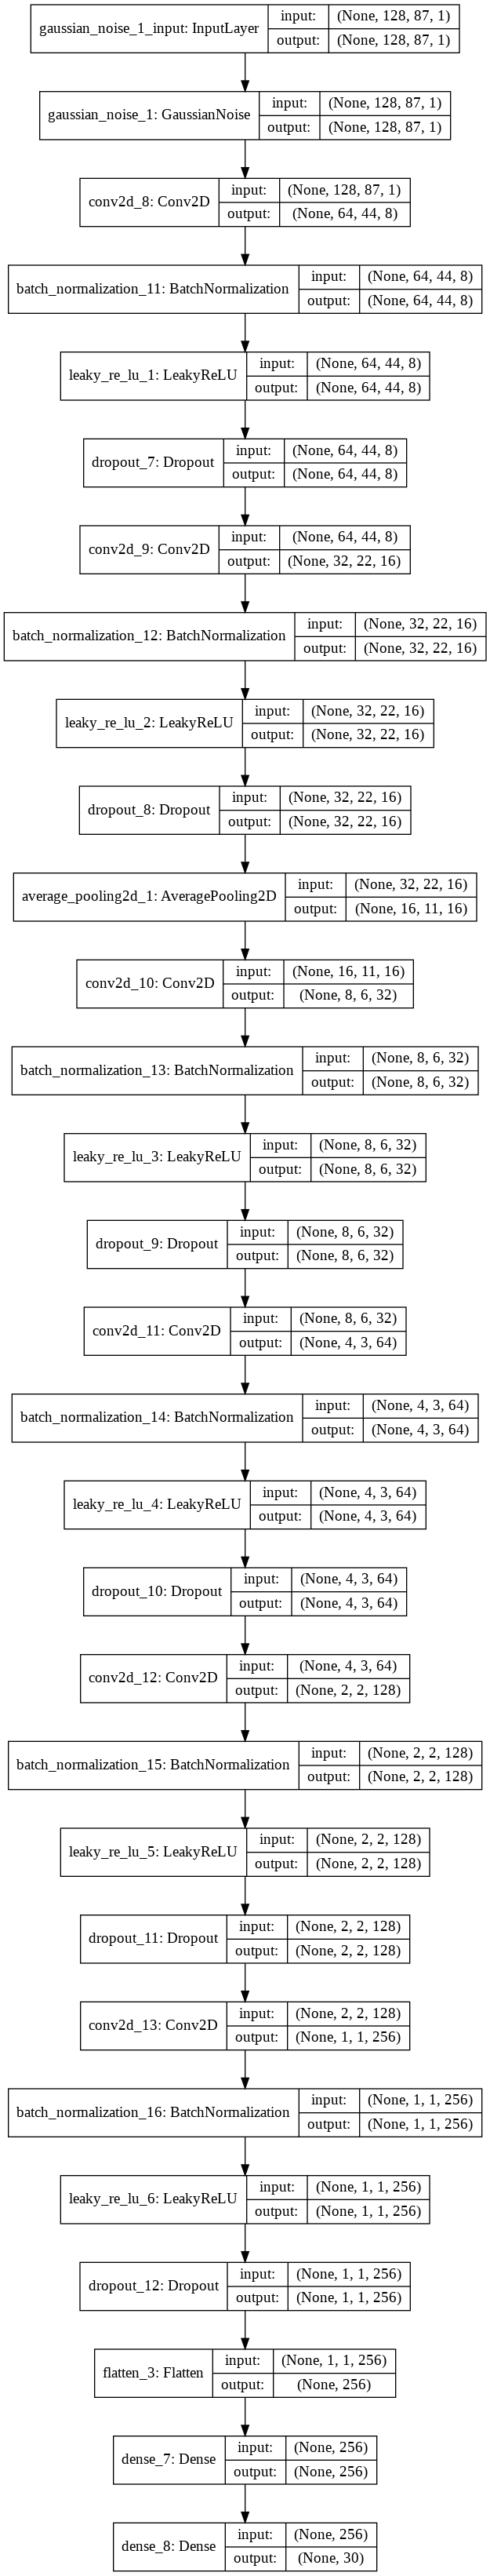

In [70]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [0]:
history_model1 = model1.fit(NM_train, NMy_train1, validation_data=(NM_test, NMy_test1),batch_size=128, epochs=150)

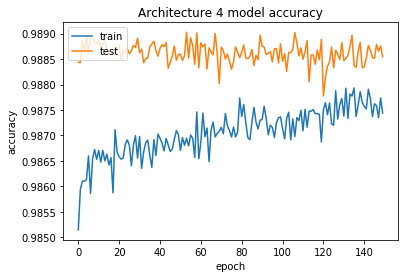

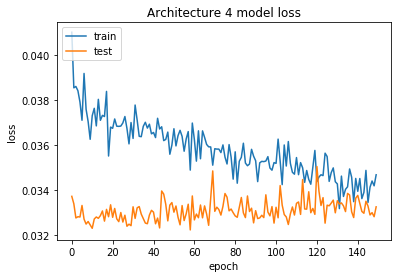

In [67]:
# summarize history for accuracy
plt.plot(history_model1.history['acc'])
plt.plot(history_model1.history['val_acc'])
plt.title('Architecture 4 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('Architecture 4 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
mel_pred = np.argmax(model1.predict(NM_test), axis=1, out=None)
mel_labels = np.argmax(NMy_test1,axis=1,out=None)
print(classification_report(mel_pred, mel_labels))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       140
           1       0.89      0.88      0.89       185
           2       0.73      0.93      0.82       129
           3       0.64      0.63      0.63       179
           4       0.68      0.69      0.68       181
           5       0.77      0.76      0.76       172
           6       0.89      0.93      0.91       191
           7       0.94      0.78      0.85       193
           8       0.83      0.85      0.84       181
           9       0.83      0.77      0.80       198
          10       0.80      0.77      0.79       191
          11       0.94      0.89      0.91       180
          12       0.93      0.83      0.88       196
          13       0.91      0.97      0.94       178
          14       0.82      0.86      0.84       181
          15       0.81      0.47      0.59       277
          16       0.87      0.87      0.87       193
          17       0.79    

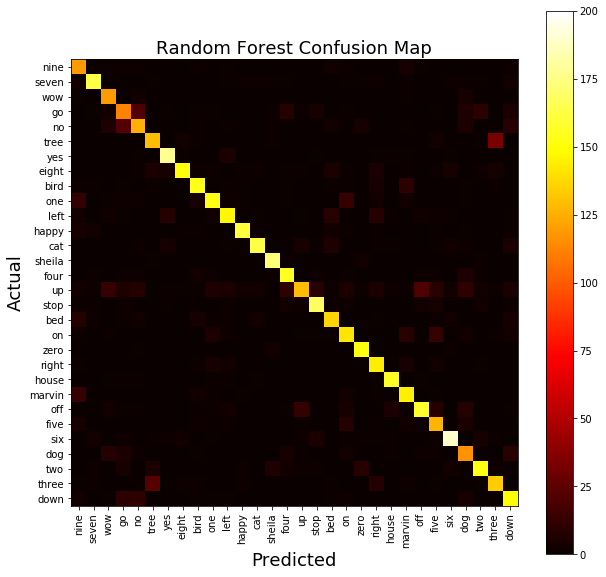

In [71]:
matrix = confusion_matrix(mel_pred, mel_labels)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('Deep CNN 2D Architecture 3', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()

In [0]:
#@title
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = '''        precision    recall  f1-score   support

           0       0.67      0.82      0.74       149
           1       0.88      0.90      0.89       179
           2       0.70      0.91      0.79       127
           3       0.58      0.67      0.62       153
           4       0.72      0.73      0.73       182
           5       0.74      0.73      0.74       171
           6       0.81      0.95      0.88       171
           7       0.96      0.72      0.82       215
           8       0.82      0.92      0.87       165
           9       0.76      0.77      0.77       182
          10       0.85      0.68      0.76       227
          11       0.89      0.89      0.89       171
          12       0.89      0.81      0.85       195
          13       0.93      0.93      0.93       188
          14       0.80      0.89      0.85       171
          15       0.89      0.43      0.58       328
          16       0.85      0.86      0.86       192
          17       0.82      0.73      0.77       195
          18       0.75      0.79      0.77       183
          19       0.87      0.99      0.93       152
          20       0.81      0.86      0.84       177
          21       0.90      0.96      0.93       161
          22       0.77      0.78      0.77       185
          23       0.86      0.78      0.82       209
          24       0.64      0.81      0.72       144
          25       0.93      0.76      0.83       258
          26       0.62      0.75      0.67       146
          27       0.78      0.82      0.80       173
          28       0.69      0.77      0.73       159
          29       0.65      0.92      0.76       142

   '''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

In [0]:
import pickle
filename = 'history_deepCNN.sav'
filename1 = 'DeepCNN_model.sav'
pickle.dump(history_model1, open(filename, 'wb'))
pickle.dump(model1, open(filename1, 'wb'))

In [0]:
#@title
mel_pred = np.argmax(model1.predict(NM_test), axis=1, out=None)
mel_labels = np.argmax(NMy_test1,axis=1,out=None)
print(classification_report(mel_pred, mel_labels))

In [0]:
history_layers = model1.fit(NM_train, NMy_train1, validation_data=(NM_test, NMy_test1),batch_size=256, epochs=150)

In [69]:
mel_pred = np.argmax(model1.predict(NM_test), axis=1, out=None)
mel_labels = np.argmax(NMy_test1,axis=1,out=None)
print(classification_report(mel_pred, mel_labels))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       140
           1       0.89      0.88      0.89       185
           2       0.73      0.93      0.82       129
           3       0.64      0.63      0.63       179
           4       0.68      0.69      0.68       181
           5       0.77      0.76      0.76       172
           6       0.89      0.93      0.91       191
           7       0.94      0.78      0.85       193
           8       0.83      0.85      0.84       181
           9       0.83      0.77      0.80       198
          10       0.80      0.77      0.79       191
          11       0.94      0.89      0.91       180
          12       0.93      0.83      0.88       196
          13       0.91      0.97      0.94       178
          14       0.82      0.86      0.84       181
          15       0.81      0.47      0.59       277
          16       0.87      0.87      0.87       193
          17       0.79    

In [0]:
A = np.load('X_wave_coeffs_0_4481.npy')
B = np.load('X_wave_coeffs_4481_7200.npy')
C = np.load('X_wave_coeffs_7200_12481.npy')
D = np.load('X_wave_coeffs_12841_end.npy')
X_wavelets = np.hstack([[A],[B],[C],[D]]).reshape(13623,256,256)
X_wavelets = np.expand_dims(X_wavelets,axis=3)

**CNN Architecture 4 with Wavelet Features**

In [0]:
import pywt
def define_wavelet(in_shape=(256,256,1)):
        model = Sequential()
        
        #add Gaussian noise to prevent classifier overfitting
        model.add(GaussianNoise(0.9, input_shape = [256,256,1]))
        
        #256x256x3 Image
        model.add(Conv2D(filters = 8, kernel_size = 3, strides= (2,2), padding = 'same',input_shape=in_shape))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #128x128x8
        model.add(Conv2D(filters = 16, kernel_size = 3, strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        model.add(AveragePooling2D())
        
        #64x64x16
        model.add(Conv2D(filters = 32, kernel_size = 3, strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #32x32x32
        model.add(Conv2D(filters = 64, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #16x16x64
        model.add(Conv2D(filters = 128, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #8x8x128
        model.add(Conv2D(filters = 256, kernel_size = 3,strides=(2,2), padding = 'same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.25))
        #model.add(AveragePooling2D())
        
        #4x4x256
        model.add(Flatten())
        
        #256
        model.add(Dense(256))
        model.add(LeakyReLU(0.2))
        

        model.add(Dense(30,activation = 'softmax')) #
        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [0]:
model_wave = define_wavelet()

In [0]:
NewMelwave_train, NewMelwave_test, NewMelwavey_train, NewMelwavey_test = train_test_split(X_wavelets,to_categorical(yp),test_size=0.4,shuffle=True)

In [60]:
history_wavelet = model_wave.fit(NewMelwave_train,NewMelwavey_train, validation_data=(NewMelwave_test, NewMelwavey_test), epochs=150,batch_size=256)

Train on 8173 samples, validate on 5450 samples
Epoch 1/150
8173/8173 [==============================] - 15s 2ms/step - loss: 0.1524 - acc: 0.9665 - val_loss: 0.1467 - val_acc: 0.9666
Epoch 2/150
8173/8173 [==============================] - 9s 1ms/step - loss: 0.1466 - acc: 0.9666 - val_loss: 0.1464 - val_acc: 0.9667
Epoch 3/150
8173/8173 [==============================] - 10s 1ms/step - loss: 0.1455 - acc: 0.9667 - val_loss: 0.1462 - val_acc: 0.9666
Epoch 4/150
8173/8173 [==============================] - 9s 1ms/step - loss: 0.1447 - acc: 0.9666 - val_loss: 0.1482 - val_acc: 0.9667
Epoch 5/150
8173/8173 [==============================] - 10s 1ms/step - loss: 0.1440 - acc: 0.9666 - val_loss: 0.1552 - val_acc: 0.9667
Epoch 6/150
8173/8173 [==============================] - 10s 1ms/step - loss: 0.1428 - acc: 0.9667 - val_loss: 0.1656 - val_acc: 0.9667
Epoch 7/150
8173/8173 [==============================] - 10s 1ms/step - loss: 0.1418 - acc: 0.9666 - val_loss: 0.1542 - val_acc: 0.9667
Ep

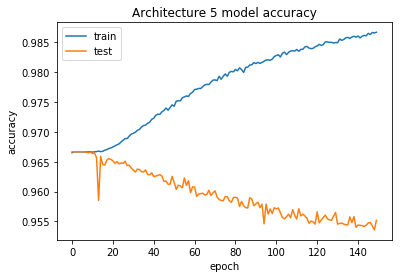

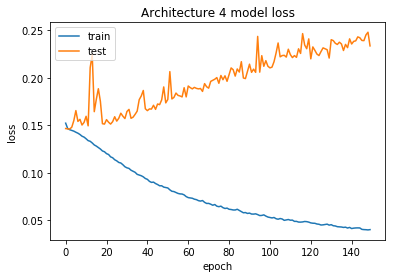

In [61]:
# summarize history for accuracy
plt.plot(history_wavelet.history['acc'])
plt.plot(history_wavelet.history['val_acc'])
plt.title('Architecture 5 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_wavelet.history['loss'])
plt.plot(history_wavelet.history['val_loss'])
plt.title('Architecture 4 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pickle
filename = 'wavelet_classifier_model.sav'
filename1 = 'history_wavelet.sav'
pickle.dump(model_wave, open(filename, 'wb'))
pickle.dump(history_wavelet,open(filename1,'wb'))

In [62]:
mel_pred = np.argmax(model_wave.predict(NewMelwave_test), axis=1, out=None)
mel_labels = np.argmax(NewMelwavey_test,axis=1,out=None)
print(classification_report(mel_pred, mel_labels))

              precision    recall  f1-score   support

           0       0.17      0.15      0.16       206
           1       0.10      0.09      0.10       211
           2       0.05      0.07      0.06       133
           3       0.08      0.07      0.08       218
           4       0.09      0.12      0.10       141
           5       0.04      0.07      0.05       120
           6       0.14      0.12      0.13       193
           7       0.11      0.13      0.12       161
           8       0.08      0.07      0.07       198
           9       0.07      0.08      0.08       153
          10       0.10      0.10      0.10       183
          11       0.26      0.22      0.24       208
          12       0.09      0.10      0.09       150
          13       0.04      0.03      0.03       189
          14       0.08      0.11      0.09       123
          15       0.16      0.14      0.15       191
          16       0.15      0.10      0.12       277
          17       0.05    

[0.17, 0.15, 0.16]
[0.1, 0.09, 0.1]
[0.05, 0.07, 0.06]
[0.08, 0.07, 0.08]
[0.09, 0.12, 0.1]
[0.04, 0.07, 0.05]
[0.14, 0.12, 0.13]
[0.11, 0.13, 0.12]
[0.08, 0.07, 0.07]
[0.07, 0.08, 0.08]
[0.1, 0.1, 0.1]
[0.26, 0.22, 0.24]
[0.09, 0.1, 0.09]
[0.04, 0.03, 0.03]
[0.08, 0.11, 0.09]
[0.16, 0.14, 0.15]
[0.15, 0.1, 0.12]
[0.05, 0.07, 0.06]
[0.09, 0.15, 0.12]
[0.17, 0.15, 0.16]
[0.12, 0.12, 0.12]
[0.19, 0.11, 0.14]
[0.11, 0.18, 0.14]
[0.2, 0.11, 0.14]
[0.08, 0.13, 0.1]
[0.35, 0.19, 0.24]
[0.04, 0.05, 0.04]
[0.06, 0.08, 0.07]
plotMat: [[0.17, 0.15, 0.16], [0.1, 0.09, 0.1], [0.05, 0.07, 0.06], [0.08, 0.07, 0.08], [0.09, 0.12, 0.1], [0.04, 0.07, 0.05], [0.14, 0.12, 0.13], [0.11, 0.13, 0.12], [0.08, 0.07, 0.07], [0.07, 0.08, 0.08], [0.1, 0.1, 0.1], [0.26, 0.22, 0.24], [0.09, 0.1, 0.09], [0.04, 0.03, 0.03], [0.08, 0.11, 0.09], [0.16, 0.14, 0.15], [0.15, 0.1, 0.12], [0.05, 0.07, 0.06], [0.09, 0.15, 0.12], [0.17, 0.15, 0.16], [0.12, 0.12, 0.12], [0.19, 0.11, 0.14], [0.11, 0.18, 0.14], [0.2, 0.11, 0.14

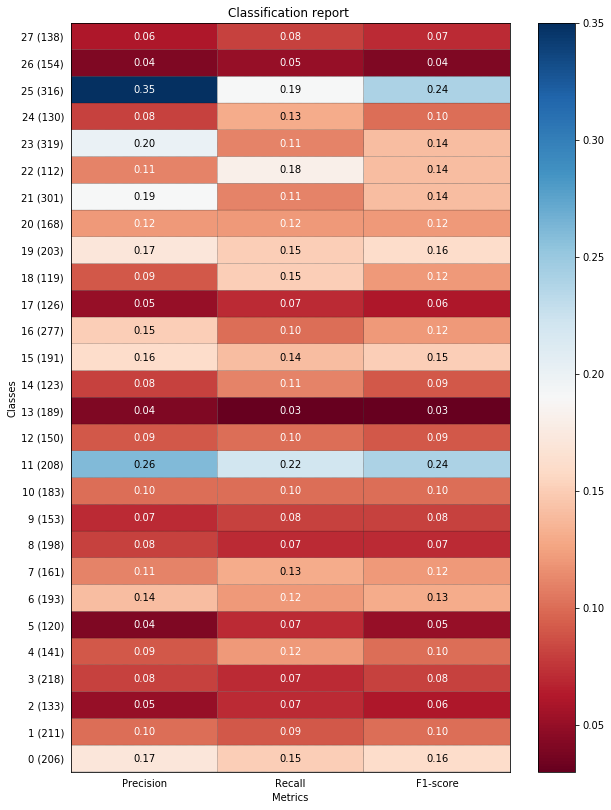

In [64]:
#@title
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = ''' precision    recall  f1-score   support

           0       0.17      0.15      0.16       206
           1       0.10      0.09      0.10       211
           2       0.05      0.07      0.06       133
           3       0.08      0.07      0.08       218
           4       0.09      0.12      0.10       141
           5       0.04      0.07      0.05       120
           6       0.14      0.12      0.13       193
           7       0.11      0.13      0.12       161
           8       0.08      0.07      0.07       198
           9       0.07      0.08      0.08       153
          10       0.10      0.10      0.10       183
          11       0.26      0.22      0.24       208
          12       0.09      0.10      0.09       150
          13       0.04      0.03      0.03       189
          14       0.08      0.11      0.09       123
          15       0.16      0.14      0.15       191
          16       0.15      0.10      0.12       277
          17       0.05      0.07      0.06       126
          18       0.09      0.15      0.12       119
          19       0.17      0.15      0.16       203
          20       0.12      0.12      0.12       168
          21       0.19      0.11      0.14       301
          22       0.11      0.18      0.14       112
          23       0.20      0.11      0.14       319
          24       0.08      0.13      0.10       130
          25       0.35      0.19      0.24       316
          26       0.04      0.05      0.04       154
          27       0.06      0.08      0.07       138
          28       0.09      0.09      0.09       172
          29       0.04      0.05      0.04       137'''

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

In [0]:
#@title
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

def main():
    sampleClassificationReport = 

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

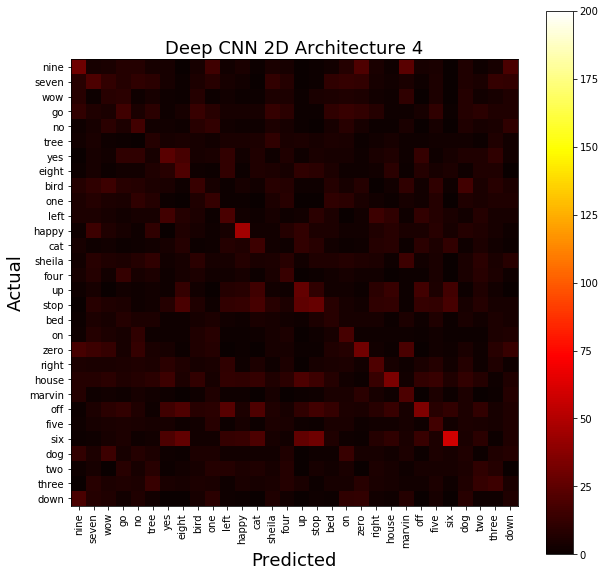

In [63]:
matrix = confusion_matrix(mel_pred, mel_labels)
plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('Deep CNN 2D Architecture 4', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(30), class_label, fontsize=10)
plt.xticks(range(30), class_label, fontsize=10, rotation='vertical')
plt.show()